In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from itertools import product

In [3]:
xd = xr.load_dataset('./AirTempData.nc')

In [4]:
xd

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144, time: 894)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2022-06-01
Data variables:
    air      (time, lat, lon) float32 -34.93 -34.93 -34.93 ... -49.51 -49.51
Attributes:
    description:    Data from NCEP initialized reanalysis (4x/day).  These ar...
    platform:       Model
    Conventions:    COARDS
    NCO:            netCDF Operators version 4.8.1 (Homepage = http://nco.sf....
    history:        Thu Aug  4 01:41:34 2022: ncrcat -O -d time,1948-01-01 00...
    title:          monthly mean air.sig995 from the NCEP Reanalysis
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

In [5]:
Xregion = xd.sel(lat=slice(6., -6., 1),
                 lon=slice(190., 240., 1))
Xregion

<xarray.Dataset>
Dimensions:  (lat: 5, lon: 21, time: 894)
Coordinates:
  * lat      (lat) float32 5.0 2.5 0.0 -2.5 -5.0
  * lon      (lon) float32 190.0 192.5 195.0 197.5 ... 232.5 235.0 237.5 240.0
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2022-06-01
Data variables:
    air      (time, lat, lon) float32 25.83 25.72 25.7 ... 24.59 24.8 24.49
Attributes:
    description:    Data from NCEP initialized reanalysis (4x/day).  These ar...
    platform:       Model
    Conventions:    COARDS
    NCO:            netCDF Operators version 4.8.1 (Homepage = http://nco.sf....
    history:        Thu Aug  4 01:41:34 2022: ncrcat -O -d time,1948-01-01 00...
    title:          monthly mean air.sig995 from the NCEP Reanalysis
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

In [6]:
Yregion = xd.sel(lat=slice(65., 50., 1),
                 lon=slice(200., 240., 1))
Yregion

<xarray.Dataset>
Dimensions:  (lat: 7, lon: 17, time: 894)
Coordinates:
  * lat      (lat) float32 65.0 62.5 60.0 57.5 55.0 52.5 50.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 232.5 235.0 237.5 240.0
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2022-06-01
Data variables:
    air      (time, lat, lon) float32 -20.8 -20.1 -18.71 ... 9.131 8.67 8.339
Attributes:
    description:    Data from NCEP initialized reanalysis (4x/day).  These ar...
    platform:       Model
    Conventions:    COARDS
    NCO:            netCDF Operators version 4.8.1 (Homepage = http://nco.sf....
    history:        Thu Aug  4 01:41:34 2022: ncrcat -O -d time,1948-01-01 00...
    title:          monthly mean air.sig995 from the NCEP Reanalysis
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

In [7]:
import folium

In [8]:
mapobj = folium.Map(location=[35, 215], zoom_start=3)

kw = {
    "color": "blue",
    "line_cap": "round",
    "fill": True,
    "fill_color": "red",
    "weight": 5,
}

boundsX = [[Xregion['lat'].min(), Xregion['lon'].min()], [Xregion['lat'].max(), Xregion['lon'].max()]]

folium.Rectangle(
    bounds=boundsX,
    line_join="round",
    dash_array="5, 5",
    **kw,
).add_to(mapobj)

boundsY = [[Yregion['lat'].min(), Yregion['lon'].min()], [Yregion['lat'].max(), Yregion['lon'].max()]]

folium.Rectangle(
    bounds=boundsY,
    line_join="round",
    dash_array="5, 5",
    **kw,
).add_to(mapobj)

mapobj

In [9]:
from itertools import product

In [10]:
i, j, k, l = 15, 6, 4, 15

Xregion = xd.sel(lat=slice(6., -6., k),
                 lon=slice(190., 240., i))
Yregion = xd.sel(lat=slice(65., 50., j),
                 lon=slice(200., 240., l))

# Xlats = list(range(6, -6, -k))
# Xlons = list(range(190, 240, i))

# print(Xlats)
# print(Xlons)

# Xlatlons = list(map(lambda x: list(x), product(Xlats, Xlons)))

# Ylats = list(range(65, 50, -j))
# Ylons = list(range(200, 240, l))

# print(Ylats)
# print(Ylons)

# Ylatlons = list(map(lambda x: list(x), product(Ylats, Ylons)))

# print(Xlatlons)
# print(len(Xlatlons))
# print(Ylatlons)
# print(len(Ylatlons))

mapobj = folium.Map(location=[40, 215], zoom_start=3)

# kw = {
#     "color": "blue",
#     "line_cap": "round",
#     "fill": True,
#     "fill_color": "red",
#     "weight": 5,
# }

Xlatlons = list(product(Xregion.lat, Xregion.lon))

for xll in Xlatlons:
    boundsX = [xll, [xll[0] + k, xll[1] + i]]

    folium.Marker(xll).add_to(mapobj)

Ylatlons = list(product(Yregion.lat, Yregion.lon))

for yll in Ylatlons:
    boundsY = [yll, [yll[0] + j, yll[1] + l]]

    folium.Marker(yll, color="red").add_to(mapobj)

kw = {
    "color": "blue",
    "line_cap": "round",
    "fill": True,
    "fill_color": "red",
    "weight": 5,
}

boundsX = [[6, 190], [-6, 240]]

folium.Rectangle(
    bounds=boundsX,
    line_join="round",
    dash_array="5, 5",
    **kw,
).add_to(mapobj)

boundsY = [[65, 200], [50, 240]]

folium.Rectangle(
    bounds=boundsY,
    line_join="round",
    dash_array="5, 5",
    **kw,
).add_to(mapobj)

mapobj

In [11]:
Xregion.lon

<xarray.DataArray 'lon' (lon: 2)>
array([190. , 227.5], dtype=float32)
Coordinates:
  * lon      (lon) float32 190.0 227.5
Attributes:
    units:          degrees_east
    long_name:      Longitude
    standard_name:  longitude
    axis:           X
    actual_range:   [  0.  357.5]

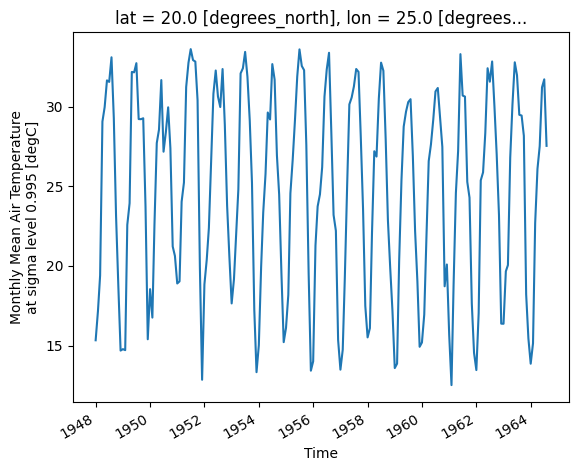

In [12]:
xd.sel(lat=20, lon=25).isel(time=slice(0, 200)).air.plot()

(array([  1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,
          1.,   2.,   2.,   2.,   2.,   2.,   6.,   4.,   3.,   3.,   8.,
          2.,   2.,   5.,   4.,   6.,   8.,   9.,  10.,   9.,   8.,  13.,
         13.,  12.,  13.,  13.,  23.,  15.,  26.,  20.,  26.,  33.,  23.,
         32.,  33.,  33.,  36.,  36.,  44.,  37.,  52.,  60.,  53.,  58.,
         63.,  66.,  66.,  73.,  75.,  83.,  81.,  97.,  97.,  78., 107.,
         95., 115., 144., 137., 130., 135., 156., 146., 147., 156., 167.,
        187., 192., 182., 206., 195., 219., 238., 246., 267., 244., 278.,
        304., 290., 325., 333., 338., 372., 389., 351., 362., 419., 390.,
        434., 420., 445., 457., 461., 491., 483., 511., 502., 496., 504.,
        495., 557., 519., 486., 497., 440., 491., 472., 462., 495., 466.,
        473., 436., 413., 434., 410., 413., 380., 393., 361., 309., 337.,
        334., 315., 317., 300., 282., 263., 234., 237., 236., 215., 207.,
        183., 181., 181., 120., 144., 

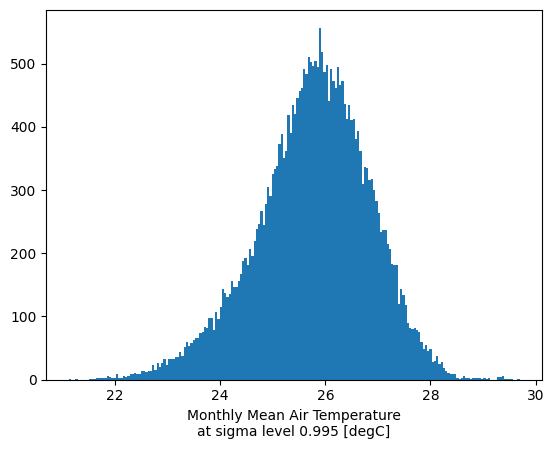

In [13]:
xd.sel(lat=slice(6.,-6., 2), lon=slice(190.,240., 2)).air.plot(bins=200)

Text(0, 0.5, 'Temperature deviation')

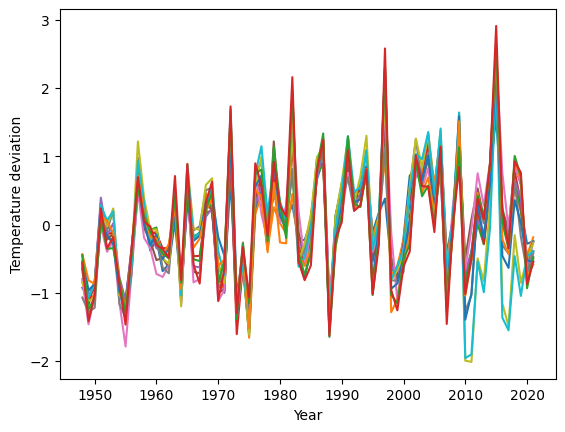

In [14]:
Xregion = xd.sel(lat=slice(6., -6., 3),
                    lon=slice(190., 240., 3))
monthlymean = Xregion.groupby("time.month").mean("time")
anomalies_Xregion = Xregion.groupby("time.month") - monthlymean

def is_ond(month):
    return (month >= 10) & (month <= 12)

ond_Xregion = anomalies_Xregion.sel(
    time=is_ond(anomalies_Xregion['time.month']))

ond_Xregion_by_year = ond_Xregion.groupby("time.year").mean()

num_ond_Xregion = np.array(ond_Xregion_by_year.to_array())[0]

reshaped_Xregion = np.reshape(num_ond_Xregion, newshape=(
    num_ond_Xregion.shape[0], num_ond_Xregion.shape[1]*num_ond_Xregion.shape[2]))

plt.plot(ond_Xregion_by_year.year, reshaped_Xregion)
plt.xlabel('Year')
plt.ylabel('Temperature deviation')

Text(0, 0.5, 'Temperature deviation')

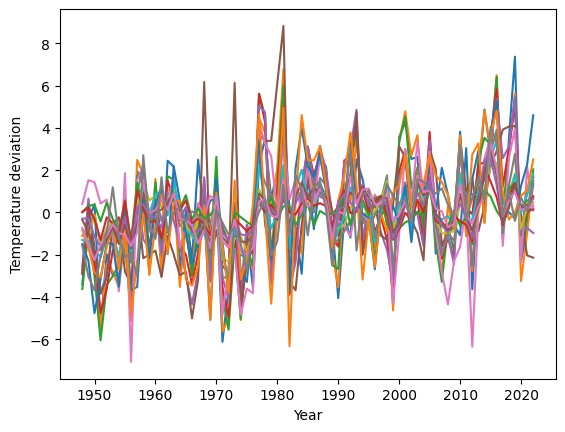

In [21]:
Yregion = xd.sel(lat=slice(65., 50., 3),
                 lon=slice(200., 240., 3))
monthlymeanY = Yregion.groupby("time.month").mean("time")
anomalies_Yregion = Yregion.groupby("time.month") - monthlymeanY

def is_jfm(month):
    return (month >= 1) & (month <= 3)

jfm_Yregion = anomalies_Yregion.sel(
    time=is_jfm(anomalies_Yregion['time.month']))

jfm_Yregion_by_year = jfm_Yregion.groupby("time.year").mean()

num_jfm_Yregion = np.array(jfm_Yregion_by_year.to_array())[0]

reshaped_Yregion = np.reshape(num_jfm_Yregion, newshape=(
    num_jfm_Yregion.shape[0], num_jfm_Yregion.shape[1]*num_jfm_Yregion.shape[2]))

plt.plot(jfm_Yregion_by_year.year, reshaped_Yregion)
plt.xlabel('Year')
plt.ylabel('Temperature deviation')

In [15]:
from tigramite import data_processing as pp


Text(0, 0.5, 'Temperature deviation')

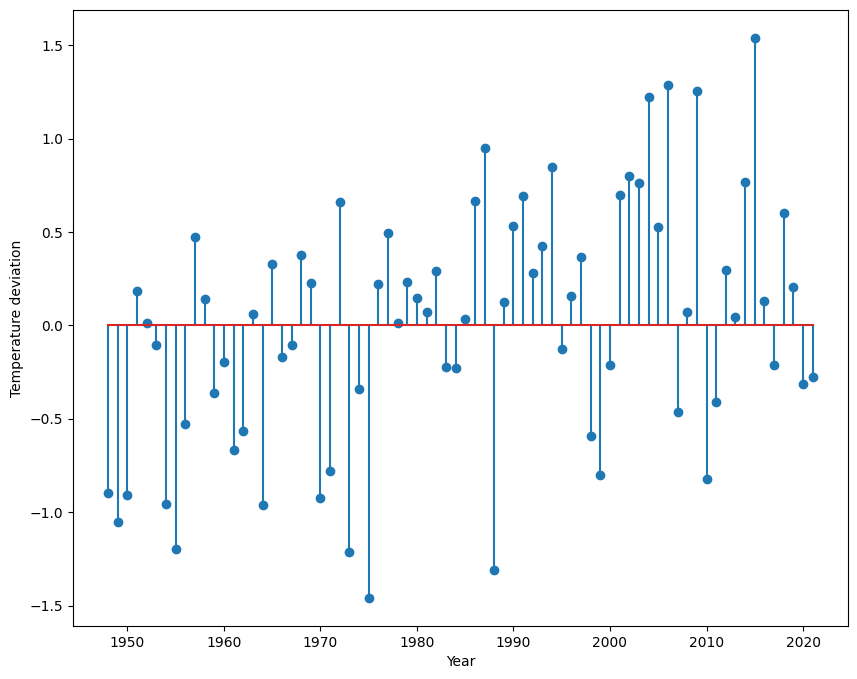

In [ ]:
reshaped_Xregion_copy = reshaped_Xregion.copy()

for var in range(reshaped_Xregion_copy.shape[1]):
        reshaped_Xregion_copy[:, var] = pp.smooth(reshaped_Xregion_copy[:, var], smooth_width=12 * 10, kernel='gaussian', mask=None,
                                             residuals=True)

plt.figure(figsize=(10, 8))
plt.stem(ond_Xregion_by_year.year, reshaped_Xregion_copy[:, 0])
plt.xlabel('Year')
plt.ylabel('Temperature deviation')

Text(0, 0.5, 'Temperature deviation')

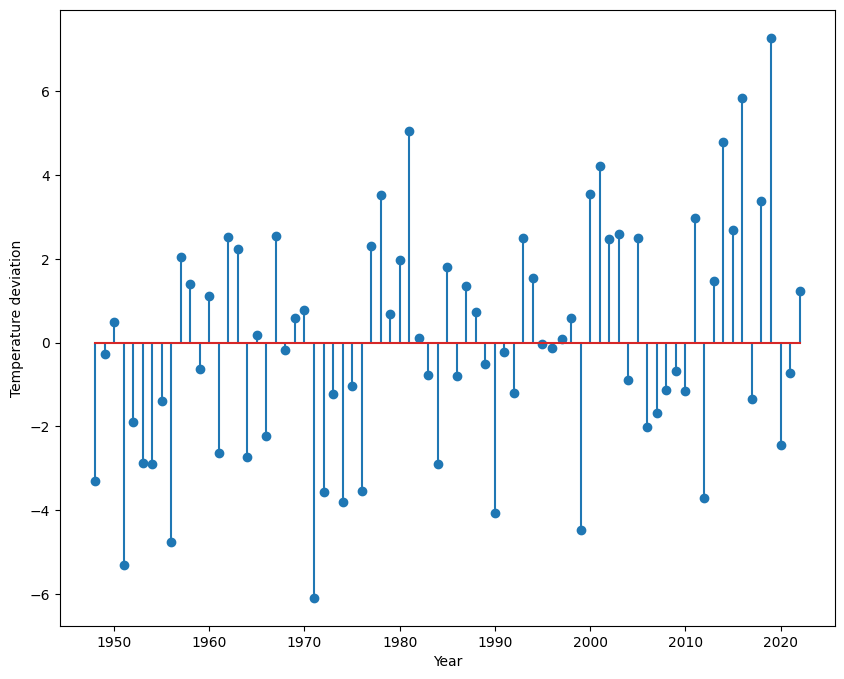

In [22]:
reshaped_Yregion_copy = reshaped_Yregion.copy()

for var in range(reshaped_Yregion_copy.shape[1]):
        reshaped_Yregion_copy[:, var] = pp.smooth(reshaped_Yregion_copy[:, var], smooth_width=12 * 10, kernel='gaussian', mask=None,
                                             residuals=True)

plt.figure(figsize=(10, 8))
plt.stem(jfm_Yregion_by_year.year, reshaped_Yregion_copy[:, 0])
plt.xlabel('Year')
plt.ylabel('Temperature deviation')

In [145]:
xd

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144, time: 894)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2022-06-01
Data variables:
    air      (time, lat, lon) float32 -34.93 -34.93 -34.93 ... -49.51 -49.51
Attributes:
    description:    Data from NCEP initialized reanalysis (4x/day).  These ar...
    platform:       Model
    Conventions:    COARDS
    NCO:            netCDF Operators version 4.8.1 (Homepage = http://nco.sf....
    history:        Thu Aug  4 01:41:34 2022: ncrcat -O -d time,1948-01-01 00...
    title:          monthly mean air.sig995 from the NCEP Reanalysis
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

In [146]:
894/74

12.08108108108108